----
Clasificadores de Distancia al Centroide
----

Para cada clase se calcula el centroide (valor medio) a partir del dataset de entrenamiento. 

Los nuevos vectores de características serán asignados a la clase cuyo centroide esté más cercano.

Existen varias métricas de distancias que pueden utilzarse. Los resultados de clasificación pueden variar.




----

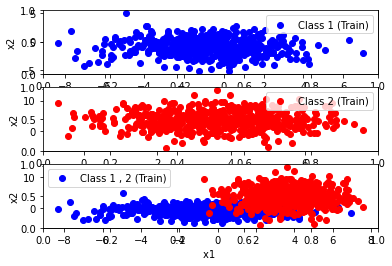

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.spatial.distance import pdist

import pandas as pd

from sklearn.neighbors import KernelDensity

# Generación Data Set Sintético (2 Clases, 2 dimensiones)

np.random.seed(1)

# Genera Datos Aleatorios Clase w1 --> 2D
N1 = 500
m1=[-1 , -1]  # mean w1
sigm1= [2.4 , 1.5]  # standar deviation class w1
X1=np.random.normal(m1, sigm1, size=(N1,2))

# Genera Datos Aleatorios Clase w2 --> 2D
N2 = 500
m2=[3.5, 3.5]  # mean w2
sigm2=[1.5, 2.9]   # standar deviation class w2
X2=np.random.normal(m2, sigm2, size=(N2, 2))

# Graficar puntos Class 1
fig, axs = plt.subplots(3,1)
axs=fig.add_subplot(3,1,1)
axs.scatter(X1[:, 0],X1[:, 1] ,marker = 'o', c='blue')
#plt.title("Data set - Class 1")
axs.legend(['Class 1 (Train)'])
axs.set_xlabel('x1 ')
axs.set_ylabel('x2')

# Graficar puntos Class 2
axs=fig.add_subplot(3,1,2)
axs.scatter(X2[:, 0],X2[:, 1]  ,marker = 'o', c='red')
#plt.title("Data set - Class 2")

axs.legend(['Class 2 (Train)' ])
axs.set_xlabel('x1 ')
axs.set_ylabel('x2')


# Plot Class 1 and Class 2
axs=fig.add_subplot(3,1,3)
axs.scatter(X1[:, 0],X1[:, 1] ,marker = 'o', c='blue')
axs.scatter(X2[:, 0],X2[:, 1]  ,marker = 'o', c='red')
#plt.title("Train: Class 1,  Class 2")

axs.legend(['Class 1 , 2 (Train)' ])
axs.set_xlabel('x1 ')
axs.set_ylabel('x2')

plt.show()

---
Cálculo del Centroide y Matriz de Covarianza para cada Clase a partir del dataset de entrenamiento
------



In [ ]:
# mean and covariance Class 1
m1_est = np.mean(X1, axis=0)
display('m1=',m1_est)
cv1_est = np.cov(X1,rowvar=False)
display('Cov1',cv1_est)

# mean Class 2
m2_est = np.mean(X2, axis=0)
display('m2=',m2_est)
cv2_est = np.cov(X2, rowvar=False ) #Cada columna es una variable
display('Cov2',cv2_est)


'm1='

array([-0.88776428, -0.9537099 ])

'Cov1'

array([[ 5.50848295, -0.23957168],
       [-0.23957168,  2.18730337]])

'm2='

array([3.54835818, 3.56499509])

'Cov2'

array([[ 2.43272752, -0.0426311 ],
       [-0.0426311 ,  8.78799594]])

----
Clasificación Distancia Mínima
--------


'Dist E 1:'

4.455123869476143

'Dist E 2:'

4.548822539078045

'Class --> w1 '

'Dist M 1:'

3.0156618008059954

'Dist M 2:'

2.9165455256483126

'Class --> w2 '

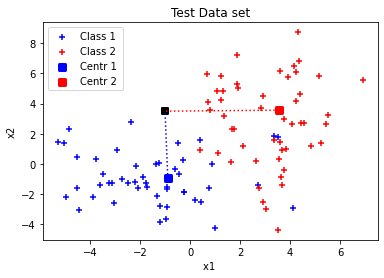

In [ ]:
# Generar Datos Aleatorios Clase w1 --> 2D
Nt1 = 50
Xt1=np.random.normal(m1, sigm1, size=(Nt1,2))

# Genera Datos Aleatorios Clase w2 --> 2D
Nt2 = 50
Xt2=np.random.normal(m2, sigm2, size=(Nt2, 2))

# Graficar Test Dataset
fig
# Graficar puntos Class 1
plt.scatter(Xt1[:, 0],Xt1[:, 1] ,marker = '+', c='blue')

# Graficar puntos Class 2
plt.scatter(Xt2[:, 0],Xt2[:, 1]  ,marker = '+', c='red')

plt.title("Test Data set")
plt.xlabel('x1 ')
plt.ylabel('x2')

# Draw the centroids
plt.scatter(m1_est[0],m1_est[1], marker='s', c='blue', linewidths=3)
plt.scatter(m2_est[0],m2_est[1], marker='s', c='red', linewidths=3)

#plt.title("Test Data set 2")
plt.legend(['Class 1 ','Class 2 ', 'Centr 1', 'Centr 2' ])


######

# Dato un solo punto a clasificar

#x=Xt1[35, :]

#x=Xt2[5, :]

#x=[-1,4]
#x=[0.5 ,4]
x=np.array([1.8 ,4])
x=np.array([1.8 ,4])
x=[-1, 3.5]

# Draw the point 
plt.scatter(x[0],x[1], marker='s', c='black', linewidths=2)

# Distancia Euclidiana
distE_1= np.sqrt(np.sum( (x-m1_est)**2 ))
display('Dist E 1:', distE_1)

distE_2= np.sqrt(np.sum( (x-m2_est)**2 ))
display('Dist E 2:', distE_2)

# Asignación de clase
if distE_1 < distE_2:
  display('Class --> w1 ')
  plt.plot([m1_est[0], x[0] ], [m1_est[1],x[1] ], c='blue', linestyle = 'dotted') 
else:
  display('Class --> w2 ')
  plt.plot([m2_est[0], x[0] ], [m2_est[1],x[1] ], c='red', linestyle = 'dotted') 


# Distancia de Mahalanobis

ter1=np.transpose((x-m1_est))
ter2=np.linalg.inv(cv1_est)
ter3=(x-m1_est)
res1= np.dot(np.dot(ter1,ter2),ter3)
distM_1= np.sqrt(res1)
display('Dist M 1:', distM_1)


ter1=np.transpose((x-m2_est))
ter2=np.linalg.inv(cv2_est)
ter3=(x-m2_est)
res2= np.dot(np.dot(ter1,ter2),ter3)
distM_2= np.sqrt(res2)
display('Dist M 2:', distM_2)

# Asignación de clase
if distM_1 < distM_2:
  display('Class --> w1 ')
  plt.plot([m1_est[0], x[0] ], [m1_est[1],x[1] ], c='blue', linestyle = 'dotted') 
else:
  display('Class --> w2 ')
  plt.plot([m2_est[0], x[0] ], [m2_est[1],x[1] ], c='red', linestyle = 'dotted') 


####
plt.show()

---
Clasificador Distancia Euclidiana
---